In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
! pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable


### Downloading 'Zomato' Dataset from Kaggle


In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os

os.makedirs("data", exist_ok=True)

file_path = "../data/zomato.csv"

!kaggle datasets download -d bhanupratapbiswas/zomato -p ../data/zomato.csv --unzip


Dataset URL: https://www.kaggle.com/datasets/bhanupratapbiswas/zomato
License(s): ODC Public Domain Dedication and Licence (PDDL)




  0%|          | 0.00/5.28M [00:00<?, ?B/s]
 19%|█▉        | 1.00M/5.28M [00:01<00:06, 655kB/s]
 38%|███▊      | 2.00M/5.28M [00:01<00:02, 1.32MB/s]
 57%|█████▋    | 3.00M/5.28M [00:01<00:01, 2.11MB/s]
 95%|█████████▍| 5.00M/5.28M [00:02<00:00, 3.98MB/s]
100%|██████████| 5.28M/5.28M [00:02<00:00, 2.56MB/s]


In [4]:
df = pd.read_csv("..\data\zomato.csv\zomato.csv")

In [5]:
df.head(20)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,Buffet
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,Buffet
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Cafes
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,NaN
9,things tend to get smokey due to the sizzlers...,service was sluggish as they took too long to...,('Rated 4.0','RATED\n Amazing cafe,\nTop floor,no outdoor seating.\nFood is delicious,though the quantity is okayish.\nI ordered 6 ...,a nice place to give a try.'),('Rated 1.0','RATED\n Located opposite to wildcraft store...,we had nachos cheese salsa which was okay. We...,it turned out worse than the garlic bread. Th...,parking facility I could not locate. Staff ca...


In [6]:
df.describe(include='all')

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
count,56235,56236,56233,56194,48414,56174,54956,56126,55914,28027,56049,55731,51642
unique,13397,11914,2639,2902,2877,5195,17712,2920,2961,8067,5553,2879,2783
top,('Rated 4.0',('Rated 4.0',Yes,No,NEW,0,('Rated 4.0',BTM,Quick Bites,('Rated 4.0',North Indian,300,Delivery
freq,942,300,30444,45268,2208,10027,412,5125,19132,407,2913,7576,24317


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

In [8]:
df.isnull().sum()

address                           17
name                              16
online_order                      19
book_table                        58
rate                            7838
votes                             78
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)      521
listed_in(type)                 4610
dtype: int64

### Data Cleaning

In [9]:
# Define a function to clean 'online_order' and 'book_table' columns
def clean_binary_columns(value):
    if value == 'Yes':
        return 1
    elif value == 'No':
        return 0
    else:
        return pd.NaT

# Clean 'online_order' and 'book_table' columns
df['online_order'] = df['online_order'].apply(clean_binary_columns)
df['book_table'] = df['book_table'].apply(clean_binary_columns)

# Remove '/5' from 'rate' and convert to numeric
df['rate'] = df['rate'].str.replace('/5', '')
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Convert 'votes' to numeric
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

# Remove commas from 'approx_cost(for two people)' and convert to numeric
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

# Remove listed_in column
df = df.drop(columns=['listed_in(type)'])

In [10]:
df['location'].value_counts()

location
BTM                                                                                                                                                                                                                                                                           5125
HSR                                                                                                                                                                                                                                                                           2523
Koramangala 5th Block                                                                                                                                                                                                                                                         2504
JP Nagar                                                                                                                                                              

In [11]:
def clean_categorical_columns(value, common_values):
    if pd.isnull(value):
        return pd.NaT
    elif value in common_values:
        return value
    else:
        return 'Other'
    
top_locations = df['location'].value_counts()[:10].index.tolist()

df['location'] = df['location'].apply(clean_categorical_columns, common_values=top_locations)

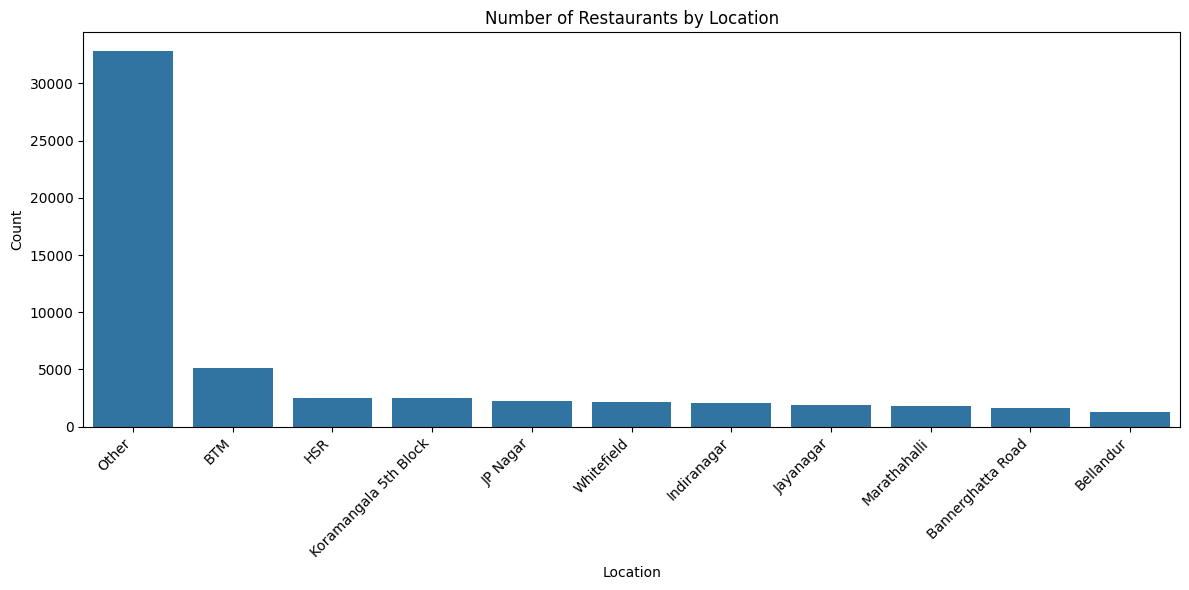

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['location'].value_counts().index, y=df['location'].value_counts().values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Number of Restaurants by Location')
plt.tight_layout()
plt.show()


In [13]:
df['rest_type'].value_counts()

rest_type
Quick Bites                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 19132
Casual Dining                                                                                                                                                                                                                                                               

In [14]:
def map_rest_type(rest_type):
    if pd.isnull(rest_type):
        return 'Other'
    rest_type = rest_type.lower()
    if 'quick' in rest_type:
        return 'Quick Bites'
    elif 'casual' in rest_type:
        return 'Casual Dining'
    elif 'cafe' in rest_type:
        return 'Cafe'
    elif 'delivery' in rest_type:
        return 'Delivery'
    elif 'dessert' in rest_type:
        return 'Dessert Parlor'
    elif 'bar' in rest_type:
        return 'Bar'
    else:
        return 'Other'

df['rest_type'] = df['rest_type'].apply(map_rest_type)
df['rest_type'].value_counts()


rest_type
Quick Bites       20713
Casual Dining     13059
Other              9634
Delivery           4693
Cafe               4488
Dessert Parlor     2780
Bar                 885
Name: count, dtype: int64

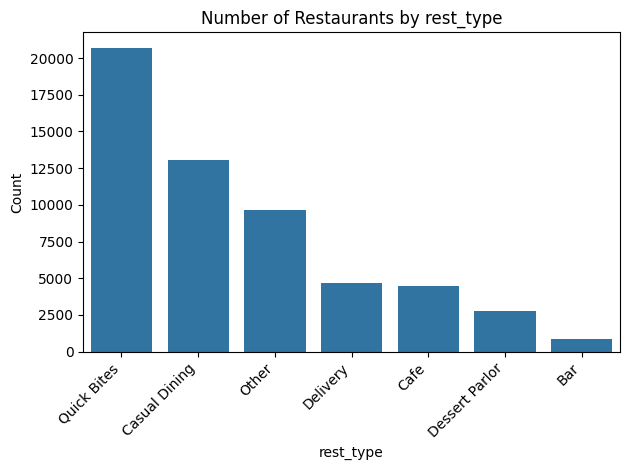

In [15]:
sns.barplot(x=df['rest_type'].value_counts().index, y=df['rest_type'].value_counts().values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('rest_type')
plt.ylabel('Count')
plt.title('Number of Restaurants by rest_type')
plt.tight_layout()
plt.show()

In [16]:
df['cuisines'].value_counts()

cuisines
North Indian                                                                                                        2913
North Indian, Chinese                                                                                               2385
South Indian                                                                                                        1828
Biryani                                                                                                              918
Bakery, Desserts                                                                                                     911
                                                                                                                    ... 
the service is a bit slow                                                                                              1
 sizzlers                                                                                                              1
 and the potion was suf

In [17]:
def map_cuisine(cuisine):
    if pd.isnull(cuisine):
        return 'Other'
    cuisine = cuisine.lower()
    main_types = ['north indian', 'chinese', 'south indian', 'fast food', 'desserts']
    found = [typ for typ in main_types if typ in cuisine]
    if len(found) == 1:
        # Return the matched main type with proper capitalization
        return found[0].title()
    elif len(found) > 1:
        return 'Mixed/Other'
    else:
        return 'Other'

df['cuisines'] = df['cuisines'].apply(map_cuisine)
df['cuisines'].value_counts()


cuisines
Other           17386
Mixed/Other     15942
North Indian     7134
Fast Food        4957
Desserts         4677
South Indian     3138
Chinese          3018
Name: count, dtype: int64

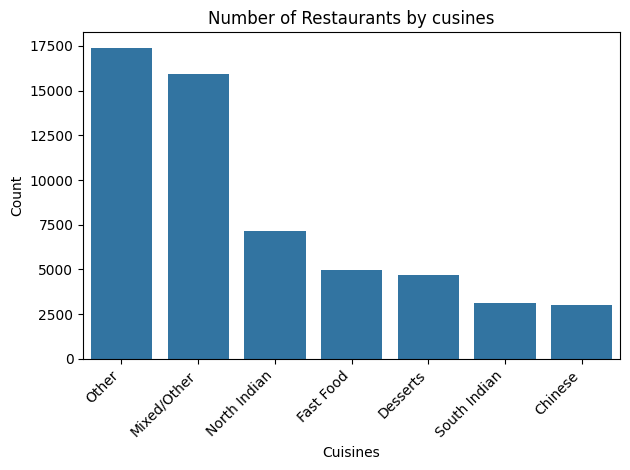

In [18]:
sns.barplot(x=df['cuisines'].value_counts().index, y=df['cuisines'].value_counts().values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.title('Number of Restaurants by cusines')
plt.tight_layout()
plt.show()

In [19]:

from collections import Counter

# Step 1: Count occurrences of each dish in 'dish_liked'
all_dishes = []
df['dish_liked'].dropna().apply(lambda x: all_dishes.extend([i.strip().lower() for i in x.split(',')]))
dish_counts = Counter(all_dishes)

# Step 2: Choose top N dishes
top_n = 10
top_dishes = set([dish for dish, count in dish_counts.most_common(top_n)])

# Step 3: Categorize each row by its most popular dish, or 'many dishes'
def categorize_dish_liked(dishes):
    if pd.isnull(dishes):
        return 'Many Dishes'
    dishes_list = [i.strip().lower() for i in dishes.split(',')]
    for dish in dishes_list:
        if dish in top_dishes:
            return dish.title()
    return 'Many Dishes'

df['dish_liked'] = df['dish_liked'].apply(categorize_dish_liked)
print(df['dish_liked'].value_counts())
# ...existing code...

dish_liked
Many Dishes    42713
Cocktails       1999
Burgers         1855
Biryani         1670
Pasta           1527
Coffee          1484
Paratha         1270
Pizza           1202
Noodles         1019
Sandwiches       837
Mocktails        676
Name: count, dtype: int64


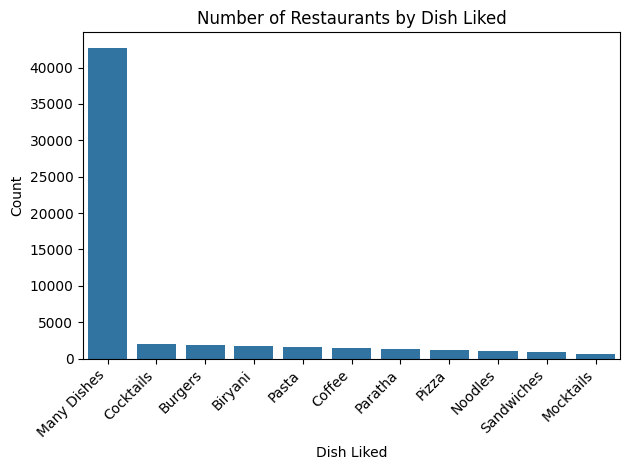

In [20]:
sns.barplot(x=df['dish_liked'].value_counts().index, y=df['dish_liked'].value_counts().values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Dish Liked')
plt.ylabel('Count')
plt.title('Number of Restaurants by Dish Liked')
plt.tight_layout()
plt.show()

In [21]:
df.isna().sum()

address                           17
name                              16
online_order                    4535
book_table                      4535
rate                           14587
votes                           4535
phone                           1296
location                         126
rest_type                          0
dish_liked                         0
cuisines                           0
approx_cost(for two people)     4881
dtype: int64

In [22]:
# Impute missing values in 'online_order' and 'book_table' with the mode
for col in ['online_order', 'book_table']:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

# Impute missing values in 'rate' and 'votes' with the median
for col in ['rate', 'votes']:
    df[col] = df[col].fillna(df[col].median())

# Impute missing values in 'location', 'rest_type', 'cuisines',  with 'Unknown'
for col in ['location', 'rest_type', 'cuisines']:
    df[col] = df[col].fillna('Unknown')

# Check for missing values in the data again
df.isna().sum()

address                          17
name                             16
online_order                      0
book_table                        0
rate                              0
votes                             0
phone                          1296
location                          0
rest_type                         0
dish_liked                        0
cuisines                          0
approx_cost(for two people)    4881
dtype: int64

In [23]:
df['name'].value_counts()

name
 ('Rated 4.0'                                                                                                                                                                                                    300
 ('Rated 5.0'                                                                                                                                                                                                    235
 ('Rated 3.0'                                                                                                                                                                                                    113
Cafe Coffee Day                                                                                                                                                                                                   96
Onesta                                                                                                                                         

In [24]:
df['name'].nunique()

11914

In [25]:
df['phone'].nunique()

17712

In [26]:
df['address'].nunique()

13397

'''

    Since there are 11914 unique values for 'name' feature I am removing it. 

    Similarly in 'phone' feature there are 17712 unique values therefore I am removing it.
    
    Similarly for 'address' feature there are 13397 unique values....
    
'''

In [27]:
# drop address, phone and missing values in dish_liked
df.drop(columns=['address', 'phone','name'], inplace=True)

In [28]:
df.isna().sum()

online_order                      0
book_table                        0
rate                              0
votes                             0
location                          0
rest_type                         0
dish_liked                        0
cuisines                          0
approx_cost(for two people)    4881
dtype: int64

In [29]:


# Drop rows where 'dish_liked' or 'approx_cost(for two people)' is missing or 'Unknown'
df = df[
    (df['dish_liked'].notna()) &
    (df['dish_liked'] != 'Unknown') &
    (df['approx_cost(for two people)'].notna())
]


In [31]:
df.head(10)

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people)
0,1,1,4.1,775.0,Other,Casual Dining,Pasta,Mixed/Other,800.0
1,1,0,4.1,787.0,Other,Casual Dining,Many Dishes,Mixed/Other,800.0
2,1,0,3.8,918.0,Other,Casual Dining,Many Dishes,Other,800.0
3,0,0,3.7,88.0,Other,Quick Bites,Many Dishes,Mixed/Other,300.0
4,0,0,3.8,166.0,Other,Casual Dining,Many Dishes,North Indian,600.0
5,1,0,3.8,286.0,Other,Casual Dining,Pasta,North Indian,600.0
6,0,0,3.6,8.0,Other,Casual Dining,Many Dishes,Mixed/Other,800.0
7,1,1,4.6,2556.0,Other,Casual Dining,Pasta,Other,600.0
8,1,0,4.0,324.0,Other,Cafe,Pizza,Other,700.0
10,1,0,4.2,504.0,Other,Cafe,Pasta,Other,550.0


### EDA

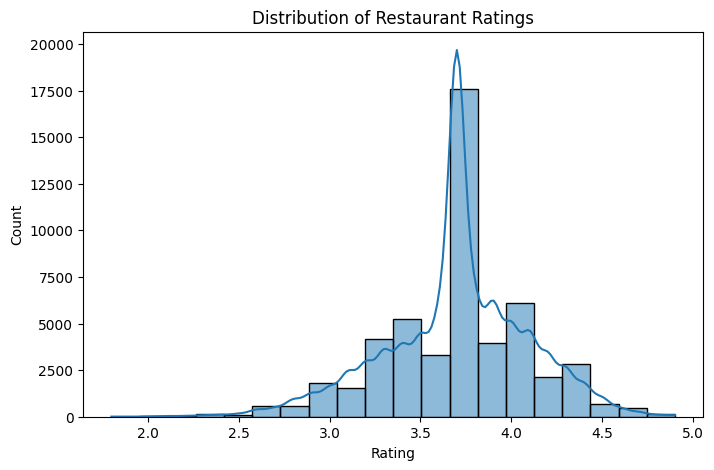

In [32]:
# 1. Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['rate'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

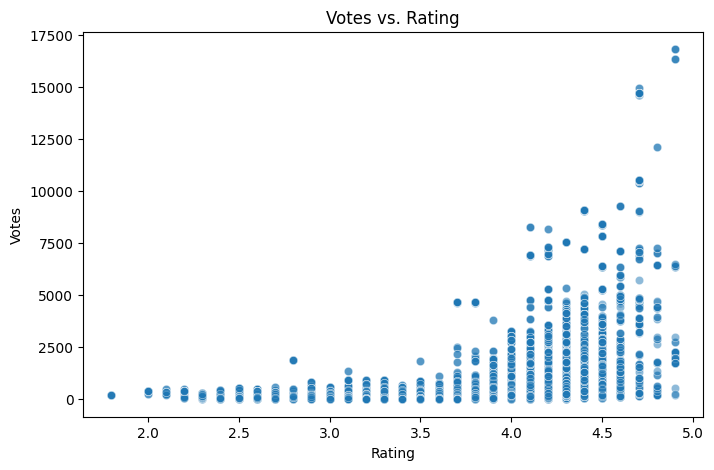

In [33]:
# 2. Votes vs. Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x='rate', y='votes', data=df, alpha=0.5)
plt.title('Votes vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()

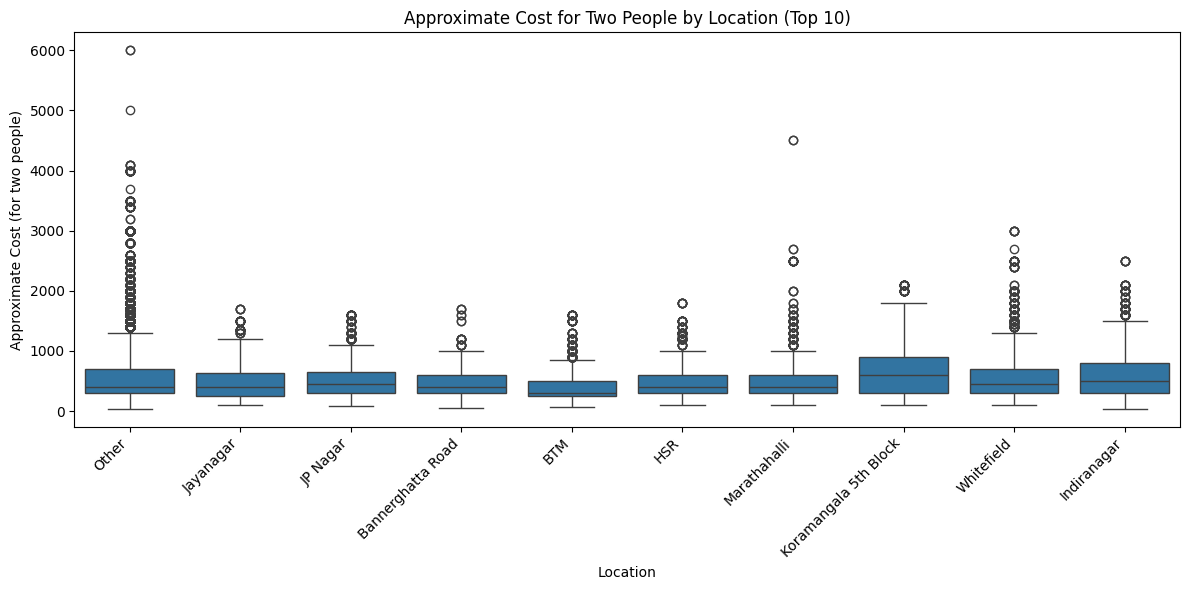

In [34]:
# 3. Average Cost by Location (Top 10)
top_locations = df['location'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.boxplot(x='location', y='approx_cost(for two people)', data=df[df['location'].isin(top_locations)])
plt.xticks(rotation=45, ha='right')
plt.title('Approximate Cost for Two People by Location (Top 10)')
plt.xlabel('Location')
plt.ylabel('Approximate Cost (for two people)')
plt.tight_layout()
plt.show()

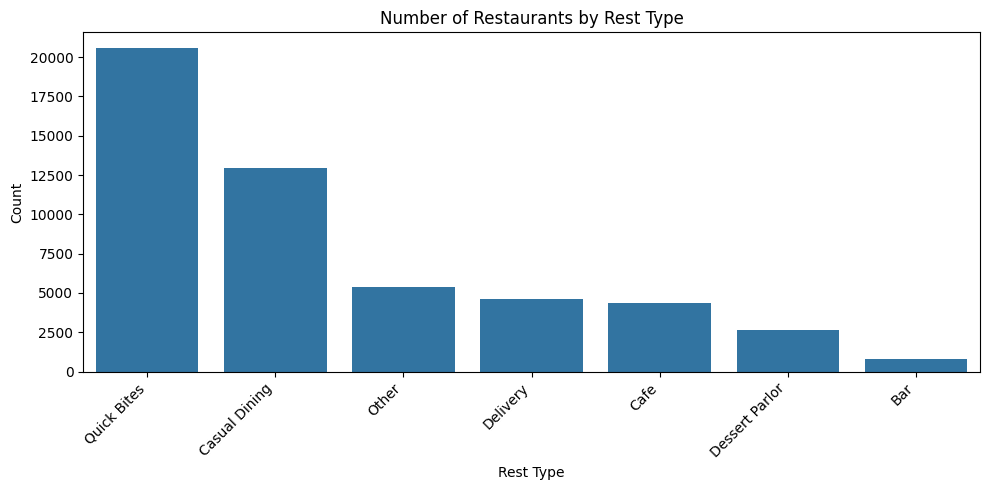

In [35]:
# 4. Count of Restaurants by Rest Type
plt.figure(figsize=(10, 5))
sns.countplot(x='rest_type', data=df, order=df['rest_type'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Restaurants by Rest Type')
plt.xlabel('Rest Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

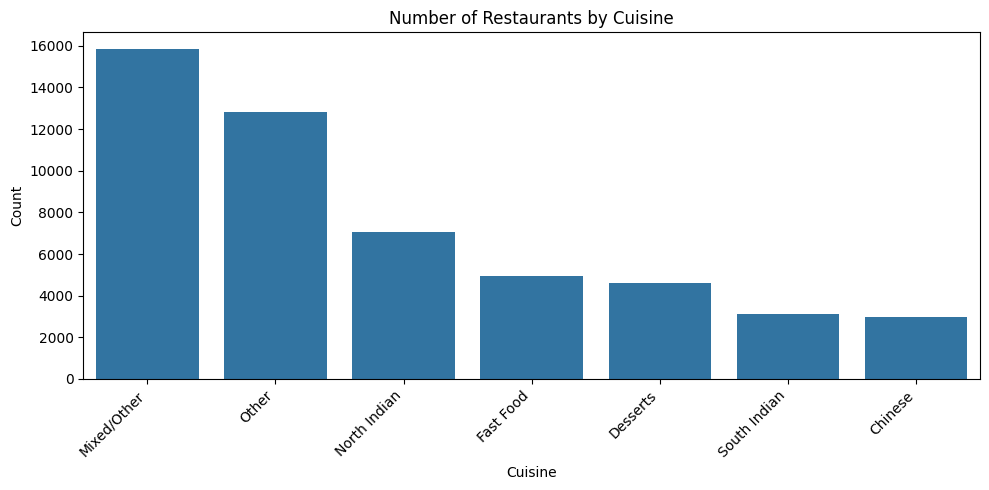

In [36]:
# 5. Count of Restaurants by Cuisine
plt.figure(figsize=(10, 5))
sns.countplot(x='cuisines', data=df, order=df['cuisines'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Restaurants by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

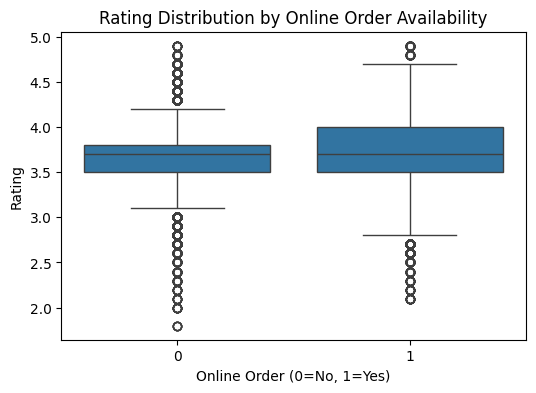

In [37]:
# 6. Online Order vs. Rating
plt.figure(figsize=(6, 4))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Rating Distribution by Online Order Availability')
plt.xlabel('Online Order (0=No, 1=Yes)')
plt.ylabel('Rating')
plt.show()

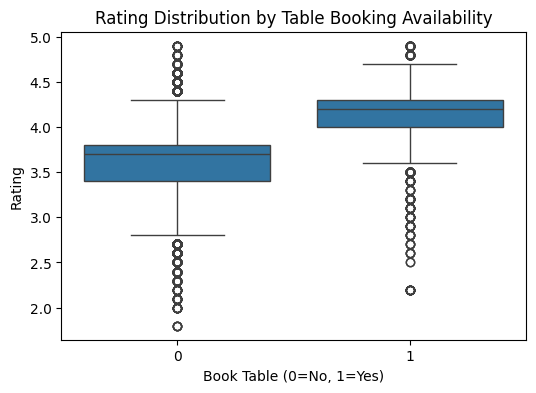

In [38]:
# 7. Book Table vs. Rating
plt.figure(figsize=(6, 4))
sns.boxplot(x='book_table', y='rate', data=df)
plt.title('Rating Distribution by Table Booking Availability')
plt.xlabel('Book Table (0=No, 1=Yes)')
plt.ylabel('Rating')
plt.show()

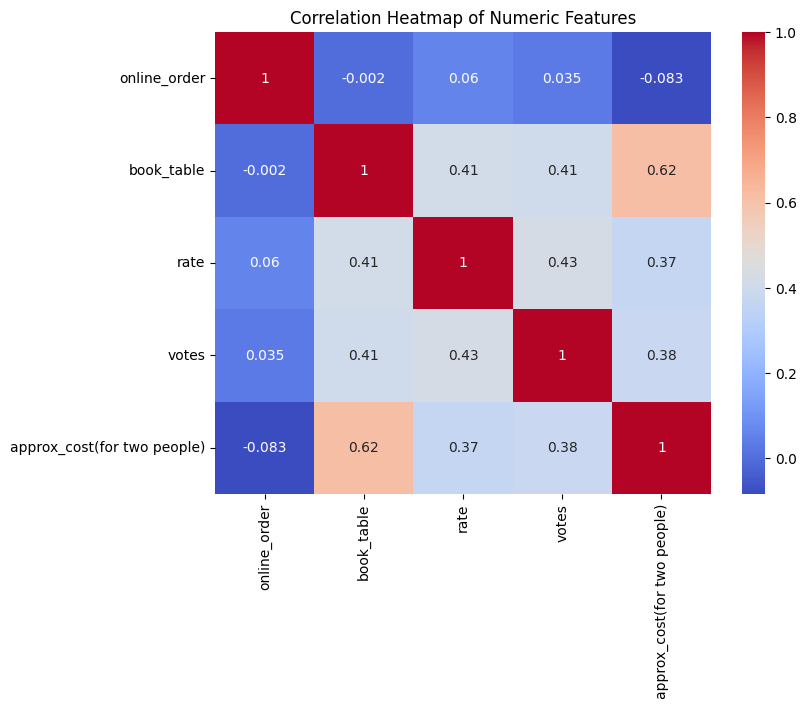

In [39]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

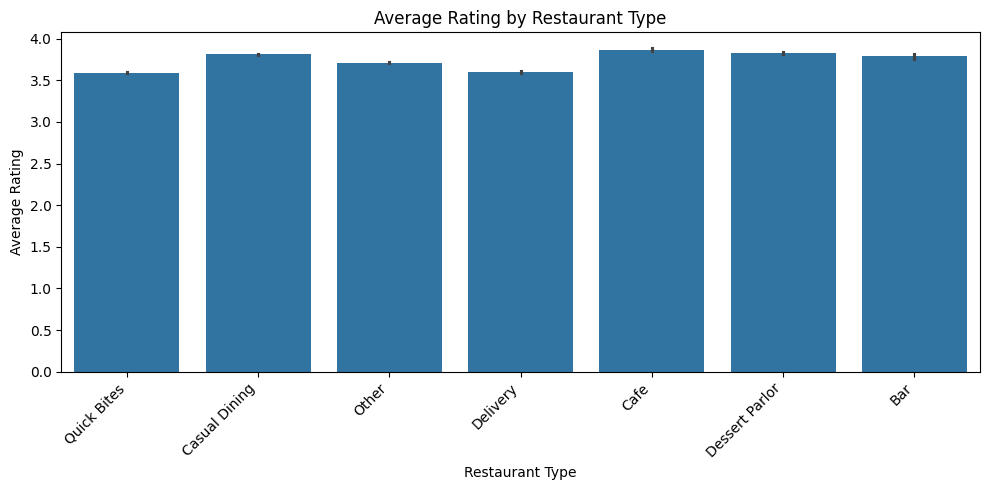

In [40]:
# Segment: Average rating by rest_type (to identify types with low ratings)
plt.figure(figsize=(10, 5))
sns.barplot(x='rest_type', y='rate', data=df, estimator=np.mean, order=df['rest_type'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Average Rating by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

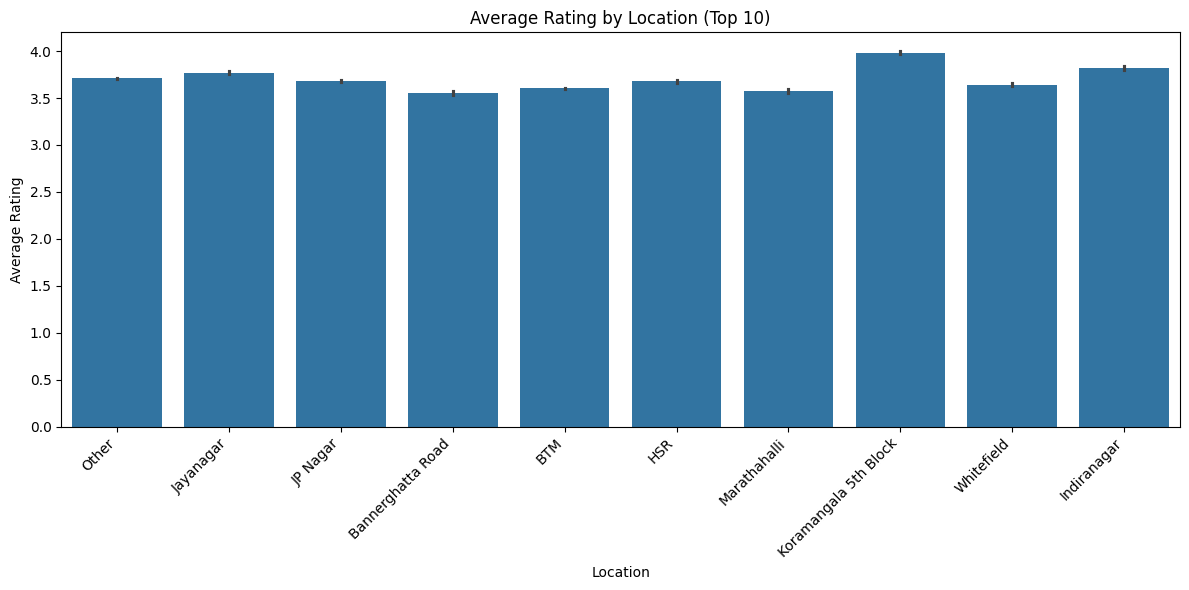

In [41]:

# Segment: Average rating by location (top 10 locations)
top_locations = df['location'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='rate', data=df[df['location'].isin(top_locations)], estimator=np.mean)
plt.xticks(rotation=45, ha='right')
plt.title('Average Rating by Location (Top 10)')
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()
